Task1_0724. Wine 데이터셋에 대하여 SVM 모델에 3개의 커널을 적용하여 학습 및 평가 결과를 출력하세요.

In [2]:
from sklearn import datasets

# 데이터 로드
wine = datasets.load_wine()
print(wine.DESCR)
print(wine.feature_names)
print(wine.target_names)
X = wine.data
y = wine.target


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
최적의 조건에서 예측 성능 지표:
예측 정확도: 0.9722
정밀도: 0.9753
재현율: 0.9722
F1 스코어: 0.9725


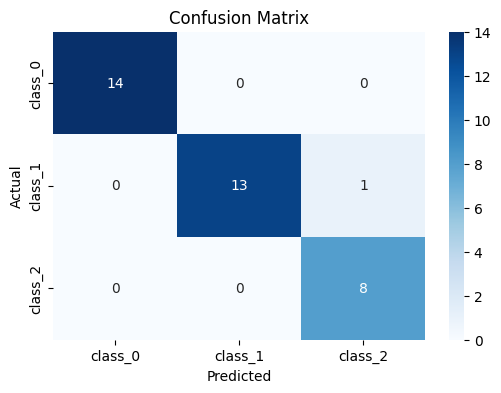

,mean_test_f1,mean_test_precision,mean_test_recall
param_kernel,,,
linear,0.954265,0.957131,0.954249
poly,0.873956,0.916862,0.879557
rbf,0.966374,0.969411,0.966564
sigmoid,0.949094,0.955174,0.949076


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import  make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 로드
wine = datasets.load_wine()
X = wine.data
y = wine.target

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습용과 테스트용 데이터셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# 사용자 정의 스코어링
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(estimator=SVC(probability=True),
                           param_grid=param_grid,
                           scoring=scoring,
                           refit='f1',
                           cv=5,
                           n_jobs=-1,
                           return_train_score=True)

grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {grid_search.best_params_}")


# 최적의 하이퍼파라미터로 학습된 모델로 예측 수행
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
y_pred_proba = best_svm.decision_function(X_test)

# 성능 지표 출력
print(f"최적의 조건에서 예측 성능 지표:")
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('정밀도: {0:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('재현율: {0:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1 스코어: {0:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 각 하이퍼파라미터 조합의 결과 출력
cv_results = pd.DataFrame(grid_search.cv_results_)
# pivot_table을 사용하여 커널별 정밀도, 재현율, F1 스코어 요약
pivot_results = cv_results.pivot_table(values=['mean_test_precision', 'mean_test_recall', 'mean_test_f1'],
                                       index='param_kernel')
pivot_results

Task2_0724. wind dataset으로 랜덤포레스트를 적용하여 모델링 및 평가를 아래의 하이퍼 파라미터를 이용하여 수행한 후 최적의 하이퍼파라미터를 구하세요.

- 'n_estimators': [50, 100, 200],
- 'max_depth': [None, 10, 20],
- 'max_features': ['auto', 'sqrt', 'log2'],
- 'min_samples_split': [2, 5, 10],
- 'min_samples_leaf': [1, 2, 4]

In [3]:
from sklearn import datasets
# 데이터 로드
wine = datasets.load_wine()

import pandas as pd
df = pd.DataFrame(wine.data, columns=wine.feature_names)
# 타겟 변수를 추가
df['target'] = wine.target
# DataFrame 출력
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
df.target.unique()

array([0, 1, 2])

In [4]:
df.info()
### no need for preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

<Figure size 1500x2000 with 0 Axes>

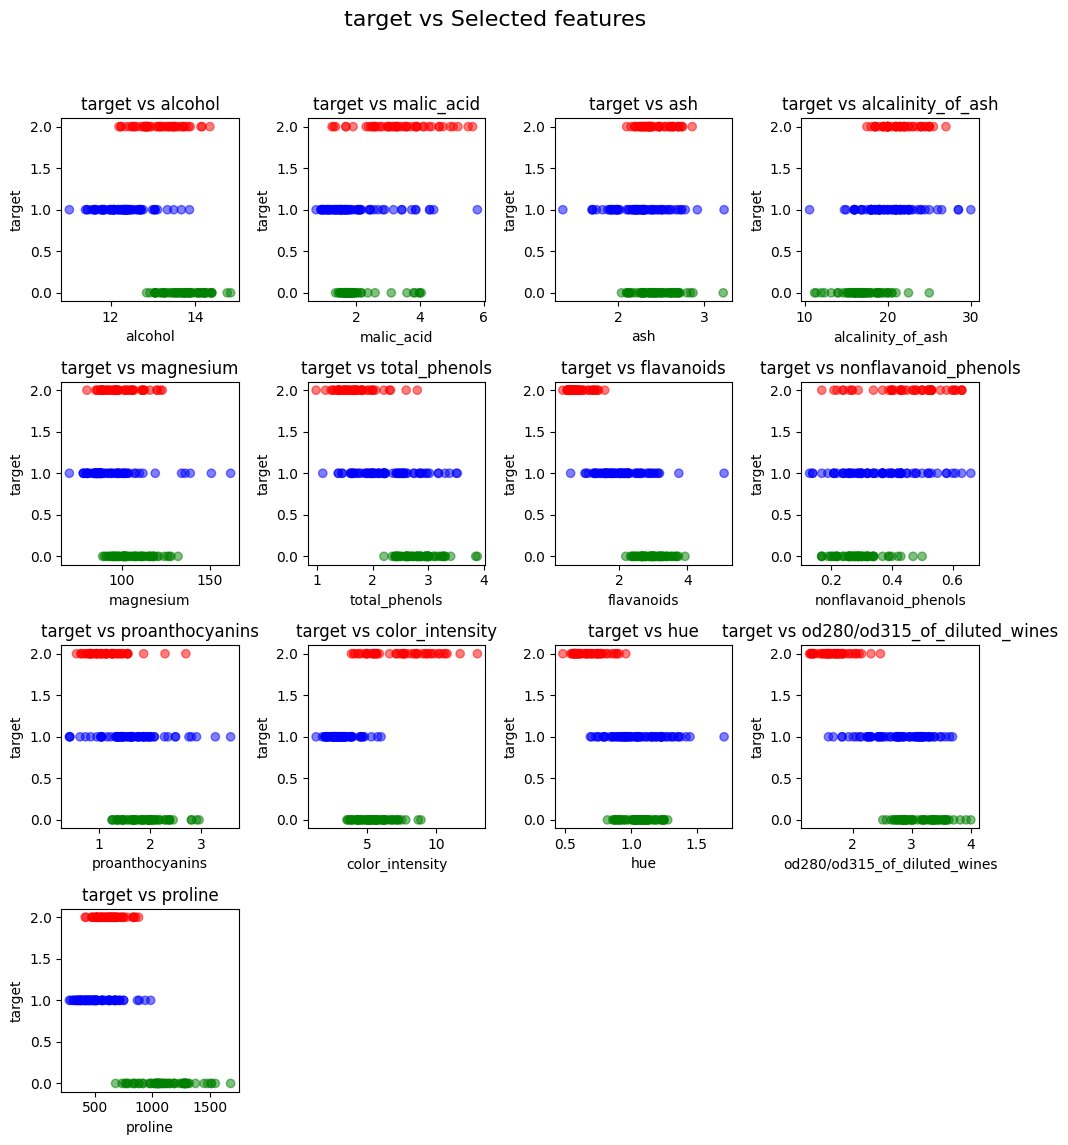

In [8]:
import matplotlib.pyplot as plt
############################# 데이터 plot quick review해보면 거의 모든 data들이 wine 데이터의 target에 관련성이 높은 것을 볼 수 있음.. 아래 correlation matrix를 통해
############################# ash 정도만 drop


# DataFrame의 열 수
num_columns = len(df.columns) - 1  # target 열 제외

# 그래프 크기 결정
plt.figure(figsize=(15, 20))

# 각 열 이름 저장
columns = df.columns.drop('target')
target = 'target'
nocols = 4  # 한 행에 그릴 그래프 수
nrows = (num_columns + nocols - 1) // nocols  # 전체 행 수 계산

fig, axes = plt.subplots(nrows=nrows, ncols=nocols, figsize=(10, 12))

# 각 열에 대해 그래프 그리기
for i, col in enumerate(columns):
    row, col_idx = divmod(i, nocols)
    ax = axes[row, col_idx]
    colors = df['target'].apply(lambda x: 'green' if x == 0 else ('blue' if x == 1 else 'red'))
    ax.scatter(df[col], df[target], c=colors, alpha=0.5)
    ax.set_title(f"{target} vs {col}")
    ax.set_xlabel(col)
    ax.set_ylabel(target)

# 나머지 빈 그래프를 숨기기
for j in range(i + 1, nrows * nocols):
    fig.delaxes(axes.flatten()[j])

fig.suptitle(f'{target} vs Selected features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<ipython-input-11-aa949b77d63f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['target'] = df['target']


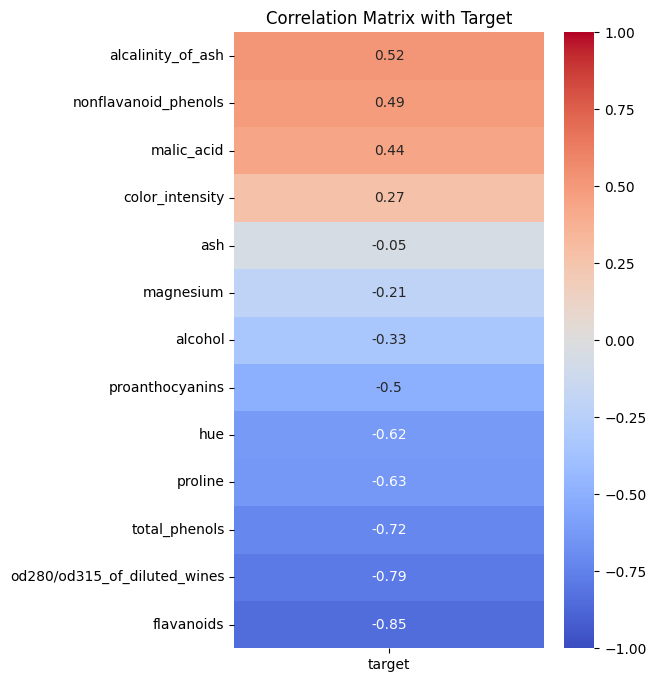

In [11]:
import seaborn as sns
# 각 특징과 target 간의 상관관계 계산
corr_matrix = df.corr()

# target과의 상관관계만 추출
corr_target = corr_matrix[['target']].drop('target').sort_values(by='target', ascending=False)

# 상관계수가 0.1 이하인 특징 제거
features_to_keep = corr_target[corr_target['target'].abs() > 0.1].index
df_filtered = df[features_to_keep]
df_filtered['target'] = df['target']

# 히트맵으로 상관관계 시각화
plt.figure(figsize=(5, 8))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Target')
plt.show()

Model: Random Forest
정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1 스코어: 1.0000
ROC AUC: 1.0000



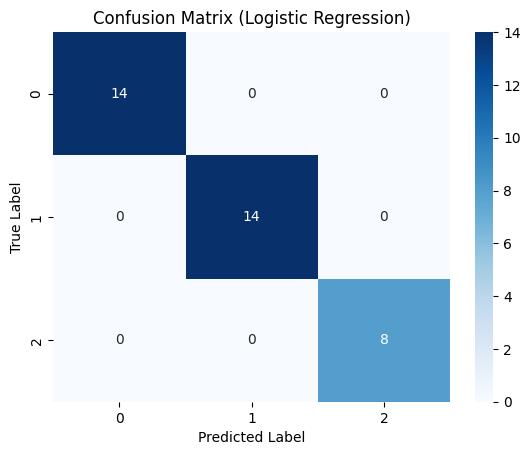

In [29]:
# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# 데이터 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습용과 테스트용 데이터셋으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 분류 모델 정의
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier

# 모델 리스트 생성
models = {
    # "Logistic Regression": LogisticRegression(max_iter=10000, solver='lbfgs', random_state=42),
    # "Decision Tree": DecisionTreeClassifier(random_state=42),
    # "SVM": SVC(probability=True, random_state=42),
    # "Naive Bayes": GaussianNB(),
    # "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    # "KNN": KNeighborsClassifier(n_neighbors=9),
    "Random Forest": RandomForestClassifier(random_state=0),
}

# 평가 함수 정의
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
def get_clf_eval(y_test, pred, pred_proba, average='macro'):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average=average)
    recall = recall_score(y_test, pred, average=average)
    f1 = f1_score(y_test, pred, average=average)
    roc_auc = roc_auc_score(y_test, pred_proba, multi_class='ovr', average=average)
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1 스코어: {:.4f}'.format(f1))
    print('ROC AUC: {:.4f}'.format(roc_auc))
    return accuracy, precision, recall, f1, roc_auc

# 모델 학습 및 평가
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    print(f"Model: {model_name}")
    results[model_name] = get_clf_eval(y_test, y_pred, y_pred_proba)
    print()

# Random Forest을 기준으로 혼동 행렬 시각화 및 평가 지표 출력
rf_model = models["Random Forest"]
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Model Evaluation:
Accuracy: 0.9737, Precision: 0.9742, Recall: 0.9697, F1 Score: 0.9719
                                                params  mean_test_accuracy  \
0    {'max_depth': None, 'max_features': 'auto', 'm...            0.953846   
1    {'max_depth': None, 'max_features': 'auto', 'm...            0.958242   
2    {'max_depth': None, 'max_features': 'auto', 'm...            0.962637   
3    {'max_depth': None, 'max_features': 'auto', 'm...            0.951648   
4    {'max_depth': None, 'max_features': 'auto', 'm...            0.958242   
..                                                 ...                 ...   
238  {'max_depth': 20, 'max_features': 'log2', 'min...            0.951648   
239  {'max_depth': 20, 'max_features': 'log2', 'min...            0.953846   
240  {'max_depth': 20, 'max_features': 'log2', 'min...            0.958242   

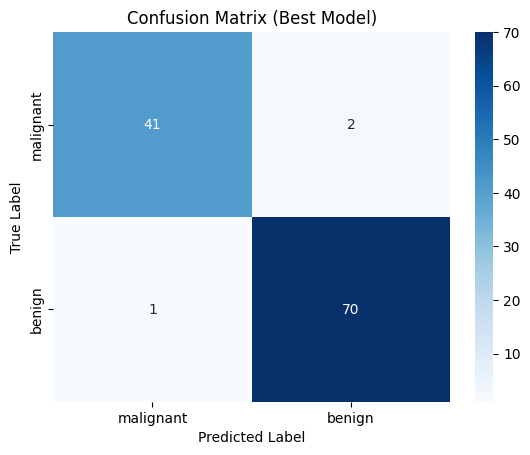

In [30]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습용과 테스트용 데이터셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 평가 함수 정의
def get_clf_eval(y_test, pred, average='macro'):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average=average)
    recall = recall_score(y_test, pred, average=average)
    f1 = f1_score(y_test, pred, average=average)
    return accuracy, precision, recall, f1

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 여러 스코어링 지표 설정
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring=scoring, refit='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# GridSearchCV 결과를 데이터프레임으로 변환
cv_results = pd.DataFrame(grid_search.cv_results_)

# 최적 하이퍼파라미터 조합 출력
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# 테스트 데이터에 대한 최적 모델의 예측
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# 최적 모델의 성능 평가
accuracy, precision, recall, f1 = get_clf_eval(y_test, y_pred_best)
print(f"Best Model Evaluation:\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# 모든 하이퍼파라미터 조합에 대한 성능 지표 출력
results_df = cv_results[['params', 'mean_test_accuracy', 'std_test_accuracy', 'mean_test_precision', 'std_test_precision', 'mean_test_recall', 'std_test_recall', 'mean_test_f1', 'std_test_f1', 'rank_test_accuracy']]
print(results_df)

# 최적 모델로 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix (Best Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [32]:
results_df = cv_results[['params', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1','rank_test_accuracy']]
results_df.head(250)

,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_accuracy
0,"{'max_depth': None, 'max_features': 'auto', 'm...",0.953846,0.951506,0.949927,0.950346,76
1,"{'max_depth': None, 'max_features': 'auto', 'm...",0.958242,0.958798,0.952247,0.954917,25
2,"{'max_depth': None, 'max_features': 'auto', 'm...",0.962637,0.963618,0.956942,0.959671,4
3,"{'max_depth': None, 'max_features': 'auto', 'm...",0.951648,0.949665,0.946985,0.947926,142
4,"{'max_depth': None, 'max_features': 'auto', 'm...",0.958242,0.960350,0.950971,0.954751,25
...,...,...,...,...,...,...
238,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.951648,0.950955,0.945768,0.947730,142
239,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.953846,0.953934,0.947582,0.950097,76
240,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.958242,0.958754,0.952277,0.954855,25
241,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.953846,0.952922,0.948768,0.950240,76


Task3. 주어진 코드를 수정해서 모델의 성능을 개선하세요

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)

# 2. 결측치 처리
# 수치형 변수의 결측치를 중앙값으로 대체
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
imputer_numeric = SimpleImputer(strategy='median')
data[numeric_features] = imputer_numeric.fit_transform(data[numeric_features])

# 범주형 변수의 결측치를 최빈값으로 대체
categorical_features = data.select_dtypes(include=[object]).columns.tolist()
categorical_features.remove('income')
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_features] = imputer_categorical.fit_transform(data[categorical_features])

# 3. 이상치 제거 (여기서는 'capital-gain'과 'capital-loss'에서 극단적인 값들을 이상치로 가정)
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

for col in numeric_features:
    data = replace_outliers_with_median(data, col)

# 4. 파생변수 작성
data['capital_diff'] = data['capital-gain'] - data['capital-loss']

# 5. 범주형 변수 인코딩
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical_data = encoder.fit_transform(data[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_features))

# 원래 데이터프레임에서 범주형 열을 제거하고 인코딩된 데이터프레임을 병합
data = data.drop(columns=categorical_features)
data = pd.concat([data, encoded_categorical_df], axis=1)

# 6. 변수 선택 및 데이터 분리
# 'income' 변수를 0과 1로 변환
data['income'] = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
X = data.drop('income', axis=1)
y = data['income']

# 7. 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. 학습용과 테스트용 데이터셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 9. Logistic Regression 모델 생성 및 학습
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 10. 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.83
Confusion Matrix:
[[4563  382]
 [ 706  862]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4945
           1       0.69      0.55      0.61      1568

    accuracy                           0.83      6513
   macro avg       0.78      0.74      0.75      6513
weighted avg       0.82      0.83      0.83      6513



### 코드 개선

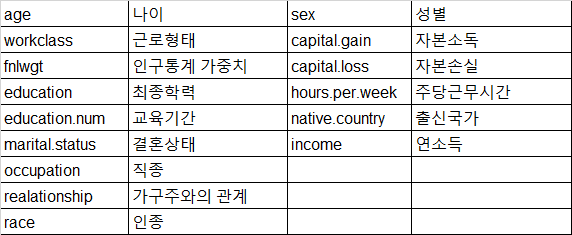

#### Adult Income 데이터셋(또는 "Census Income" 데이터셋)은 미국 인구 조사 데이터를 바탕으로 각 개인의 특성에 따른 소득 수준을 예측하는 데 사용

##### 데이터셋의 컬럼
- age: 나이 (숫자)
개인의 나이
- workclass: 직업 유형 (범주형)
'Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked' 등이 있습니다.
- fnlwgt: 최종 가중치 (숫자)
인구 조사에서 각 행이 전체 인구를 대표하는 비율을 나타내는 가중치입니다. 더 큰 값은 더 큰 대표성을 의미
- education: 교육 수준 (범주형)
개인의 교육 수준 'Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool' 등이 있습니다.
- education-num: 교육 수준(숫자) (숫자)
교육 수준을 숫자로 'Bachelors'는 13, 'HS-grad'는 9 등으로 교육의 연수를 나타냄.
- marital-status: 결혼 상태 (범주형)
'Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse' 등이 있습니다.
- occupation: 직업 (범주형)
개인의 직업 'Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces' 등이 있습니다.
- relationship: 가족 관계 (범주형)
개인의 가족 관계 'Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried' 등이 있습니다.
- race: 인종 (범주형)
개인의 인종 'White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black' 등이 있습니다.
- sex: 성별 (범주형)
개인의 성별 'Male' 또는 'Female'입니다.
- capital-gain: 자본 이득 (숫자)
개인의 자본 이득 자본 자산의 매매에서 발생하는 이익
- capital-loss: 자본 손실 (숫자)
개인의 자본 손실. 자본 자산의 매매에서 발생하는 손실
- hours-per-week: 주당 근무 시간 (숫자)
개인이 주당 일하는 시간
- native-country: 출생 국가 (범주형)
개인의 출생 국가 'United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands' 등이 있습니다.
- income: 소득 수준 (범주형)
개인의 소득 수준 ' <=50K' 또는 ' >50K'로, 연 소득이 50,000달러 이하인지 초과인지를 나타냄.

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)

# 불필요한 컬럼 제거
df = data.drop(['fnlwgt'], axis=1)

# # 이상치 제거 함수 정의
# def remove_outliers(df, column, factor=1.5):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - factor * IQR
#     upper_bound = Q3 + factor * IQR
#     df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df

# columns_to_check = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# for column in columns_to_check:
#     df = remove_outliers(df, column)

# 결측치 개수 확인
nan_counts = df.isna().sum()
# print(nan_counts)

# 결측치 제거
df = df.dropna()

# 제거 후 확인
nan_counts = df.isna().sum()
# print("\n", nan_counts)

# 파생 변수 생성
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100], labels=['0-30', '31-40', '41-50', '51-60', '60+'])
df['hours_per_week_group'] = pd.cut(df['hours-per-week'], bins=[0, 20, 40, 60, 100], labels=['0-20', '21-40', '41-60', '60+'])
df['capital_diff'] = df['capital-gain'] - df['capital-loss']

X = df.drop('income', axis=1)
y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)  # binary encoding

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 범주형 및 수치형 피처 목록
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country', 'age_group', 'hours_per_week_group']
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'capital_diff']

# 전처리기
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in numerical_features if col in X_train.columns]),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
         [col for col in categorical_features if col in X_train.columns])
    ])

# 모델과 하이퍼파라미터 그리드 딕셔너리
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=10000, random_state=42),
        "params": {
            "classifier__C": [0.01, 0.1, 1, 10, 100],
            "classifier__solver": ['lbfgs', 'liblinear']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "classifier__max_depth": [None, 10, 20, 30],
            "classifier__min_samples_split": [2, 10, 20],
            "classifier__min_samples_leaf": [1, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "classifier__n_estimators": [50, 100, 200],
            "classifier__max_depth": [None, 10, 20],
            "classifier__min_samples_split": [2, 10],
            "classifier__min_samples_leaf": [1, 5]
        }
    },
    "SVM": {
        "model": SVC(probability=True, random_state=42),
        "params": {
            "classifier__C": [0.1, 1, 10],
            "classifier__kernel": ['linear', 'rbf']
        }
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "classifier__n_estimators": [50, 100, 200],
            "classifier__learning_rate": [0.01, 0.1, 0.5],
            "classifier__max_depth": [3, 5, 10]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "classifier__n_neighbors": [3, 5, 7, 9]
        }
    }
}

# 모델 학습 및 평가
best_estimators = {}
for model_name, model_info in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_info["model"])
    ])

    grid_search = GridSearchCV(estimator=pipeline, param_grid=model_info["params"], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_estimators[model_name] = grid_search.best_estimator_
    y_pred = grid_search.best_estimator_.predict(X_test)

    # 평가
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"모델: {model_name}")
    print(f"최적 하이퍼파라미터: {grid_search.best_params_}")
    print(f"정확도: {accuracy:.2f}")
    print("혼동 행렬:")
    print(conf_matrix)
    print("분류 보고서:")
    print(class_report)
    print("="*60)

# 최적 모델을 사용한 혼동 행렬 시각화
best_model_name = max(best_estimators, key=lambda name: accuracy_score(y_test, best_estimators[name].predict(X_test)))
best_model = best_estimators[best_model_name]

# 최적 모델로 예측
y_pred_best = best_model.predict(X_test)

# 혼동 행렬 계산
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()


<ipython-input-33-efa75e6ccb42>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 100], labels=['0-30', '31-40', '41-50', '51-60', '60+'])
<ipython-input-33-efa75e6ccb42>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours_per_week_group'] = pd.cut(df['hours-per-week'], bins=[0, 20, 40, 60, 100], labels=['0-20', '21-40', '41-60', '60+'])
<ipython-input-33-efa75e6ccb42>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

모델: Logistic Regression
최적 하이퍼파라미터: {'classifier__C': 10, 'classifier__solver': 'liblinear'}
정확도: 0.85
혼동 행렬:
[[6310  457]
 [ 887 1395]]
분류 보고서:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6767
           1       0.75      0.61      0.67      2282

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.85      0.85      0.85      9049

모델: Decision Tree
최적 하이퍼파라미터: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 20}
정확도: 0.85
혼동 행렬:
[[6408  359]
 [ 956 1326]]
분류 보고서:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6767
           1       0.79      0.58      0.67      2282

    accuracy                           0.85      9049
   macro avg       0.83      0.76      0.79      9049
weighted avg       0.85      0.85      0.85      9049

모델: Random Forest

KeyboardInterrupt: 